<a href="https://colab.research.google.com/github/CM-007/DS_ASS/blob/main/Ass14_DecisionTree((Fraudcheck)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Liebraries**

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

# **Load data set**

In [111]:
data = pd.read_csv('/content/Fraud_check.csv')

# **EDA**

In [112]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## **Rename column name**

In [113]:
data.rename(columns = {'Marital.Status' : 'Marital_Status', 'Taxable.Income': 'Income', 'City.Population': 'Population',
                    'Work.Experience': 'Work_Experience'}, inplace= True)


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_Status   600 non-null    object
 2   Income           600 non-null    int64 
 3   Population       600 non-null    int64 
 4   Work_Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [115]:
data.describe()

,Income,Population,Work_Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


## **Checking NA values and remove it**

In [116]:
data.isnull().sum()

Undergrad          0
Marital_Status     0
Income             0
Population         0
Work_Experience    0
Urban              0
dtype: int64

### **Set and Add new column as per problem statment**

In [117]:
data['status'] = data['Income'].apply(lambda Income: 'Risky' if Income <= 30000 else 'Good')

### **Value check for y column**

In [118]:
data['status'].value_counts()

Good     476
Risky    124
Name: status, dtype: int64

### **Drop Income column**

In [119]:
data.drop(['Income'], axis=1, inplace=True)

In [120]:
data.head()

,Undergrad,Marital_Status,Population,Work_Experience,Urban,status
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


# **Label Encoder**

### convert categorical column into numerical

In [121]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Marital_Status'] = label_encoder.fit_transform(data['Marital_Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['status'] = label_encoder.fit_transform(data['status'])


In [122]:
data.head()

,Undergrad,Marital_Status,Population,Work_Experience,Urban,status
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


### **Value check for y column**

In [123]:
data['status'].value_counts()

0    476
1    124
Name: status, dtype: int64

# **Split Data in X and Y**

In [124]:
x=data.iloc[:,0:5]
y=data['status']

In [125]:
x

,Undergrad,Marital_Status,Population,Work_Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [126]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: status, Length: 600, dtype: int64

# **Display columns name**

In [127]:
columns = list(data.columns)
columns

['Undergrad',
 'Marital_Status',
 'Population',
 'Work_Experience',
 'Urban',
 'status']

# **Split entire data in train data test data**

In [128]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)
# 20%  test data 80% train

In [129]:
x_train

,Undergrad,Marital_Status,Population,Work_Experience,Urban
118,0,0,199174,10,0
362,1,0,75552,17,1
55,1,2,89965,16,1
90,0,0,101232,29,0
390,1,2,57324,17,0
...,...,...,...,...,...
277,0,0,117364,11,0
9,1,0,155482,4,1
359,1,2,157299,11,0
192,1,1,126556,10,1


In [130]:
x_train.shape

(480, 5)

In [131]:
x_test

,Undergrad,Marital_Status,Population,Work_Experience,Urban
434,1,2,87188,19,1
122,1,1,140762,26,0
224,0,1,55717,25,1
479,1,1,68995,21,0
205,0,1,131906,20,1
...,...,...,...,...,...
144,1,2,156503,29,1
386,0,2,140642,27,1
437,1,1,117250,20,1
313,1,2,124848,2,0


In [132]:
y_test

434    1
122    1
224    0
479    0
205    1
      ..
144    0
386    0
437    1
313    0
471    1
Name: status, Length: 120, dtype: int64

In [133]:
y_test.shape

(120,)

In [134]:
y_train

118    1
362    1
55     1
90     0
390    0
      ..
277    0
9      0
359    0
192    0
559    0
Name: status, Length: 480, dtype: int64

# **Building Decision Tree Classifier using Entropy Criteria**

In [135]:
# c5.0 model max depth = 3
model = DecisionTreeClassifier(criterion='entropy',max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

## **Plot the Decision Tree**

[Text(0.5, 0.8333333333333334, 'x[3] <= 24.5\nentropy = 0.734\nsamples = 480\nvalue = [381, 99]'),
 Text(0.25, 0.5, 'x[2] <= 197770.0\nentropy = 0.77\nsamples = 373\nvalue = [289, 84]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.759\nsamples = 369\nvalue = [288, 81]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.75, 0.5, 'x[3] <= 25.5\nentropy = 0.585\nsamples = 107\nvalue = [92, 15]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.633\nsamples = 94\nvalue = [79, 15]')]

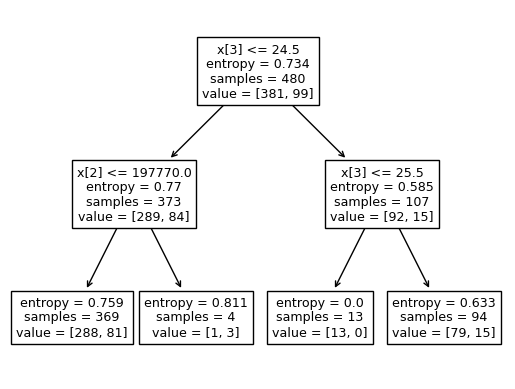

In [136]:
tree.plot_tree(model)

In [137]:
y_train.value_counts()

0    381
1     99
Name: status, dtype: int64

Butification of Tree

[Text(0.5, 0.8333333333333334, 'Petal Width <= 24.5\nentropy = 0.734\nsamples = 480\nvalue = [381, 99]\nclass = setosa'),
 Text(0.25, 0.5, 'Petal Length <= 197770.0\nentropy = 0.77\nsamples = 373\nvalue = [289, 84]\nclass = setosa'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.759\nsamples = 369\nvalue = [288, 81]\nclass = setosa'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = versicolor'),
 Text(0.75, 0.5, 'Petal Width <= 25.5\nentropy = 0.585\nsamples = 107\nvalue = [92, 15]\nclass = setosa'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = setosa'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.633\nsamples = 94\nvalue = [79, 15]\nclass = setosa')]

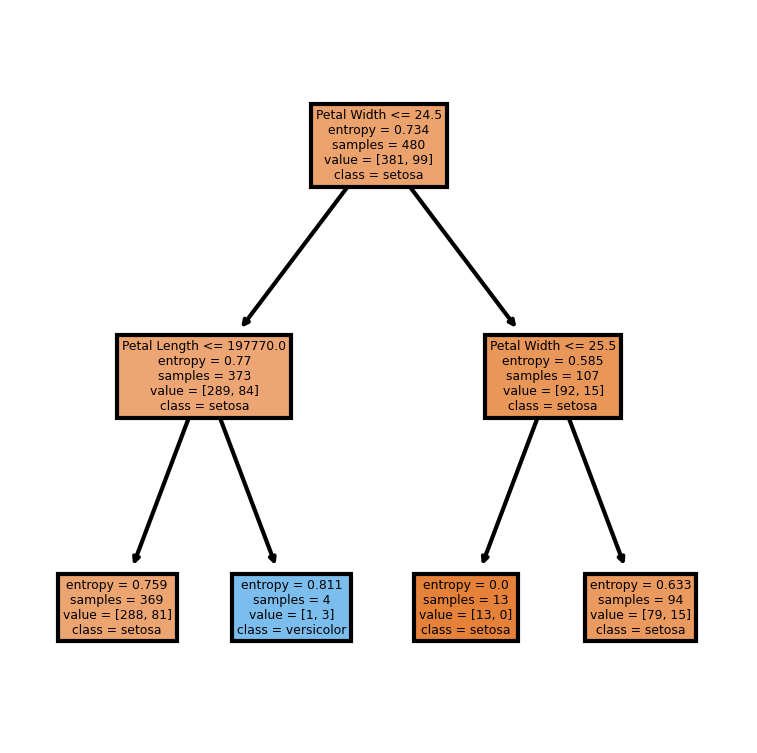

In [138]:
feature_name = ['Sepal Length','Sepal Width', 'Petal Length', 'Petal Width',]
class_name = ['setosa','versicolor','virginica']

fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=300)
tree.plot_tree(model,
               feature_names=feature_name,
               class_names=class_name,
               filled=True
               )

# **Predicting on test data**

In [139]:
pred= model.predict(x_test) # predicting on test data set
pd.Series(pred).value_counts() # getting the count of each category


0    119
1      1
dtype: int64

# **Crosstab**

In [140]:
pd.crosstab(pred,y_test)

status,0,1
row_0,,
0,94,25
1,1,0


## **Accuracy**

In [141]:
round(np.mean(pred==y_test)*100,2)

78.33

# **Building Decision Tree Classifier(CART) using Gini Criteria**

In [142]:
model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth = 2)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

# **Plot Decision Tree for Gini**

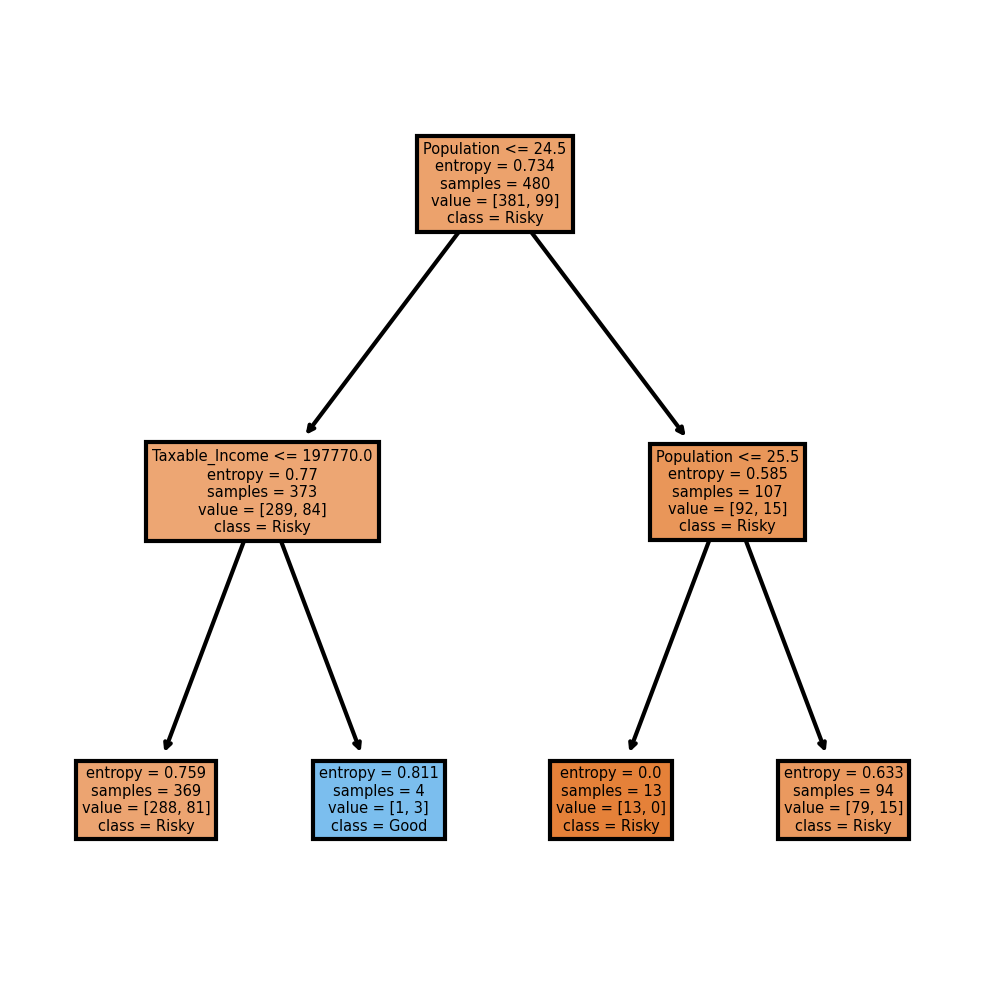

In [143]:
fn = ['Undergrad', 'Marital_Status', 'Taxable_Income', 'Population', 'Work_Experiance', 'Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

# **predict and computing the accuracy**

In [144]:
pred = model_gini.predict(x_test)

In [145]:
pd.Series(pred).value_counts()

0    119
1      1
dtype: int64

# **Crosstab**

In [146]:
pd.crosstab(pred,y_test)

status,0,1
row_0,,
0,94,25
1,1,0


# **Check Accuracy**

In [147]:
round(np.mean(pred==y_test)*100,2)

78.33